In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
theta1 = 45. #Degrees
theta2 = 5. #Degrees
theta3 = 45. #Degrees
Ue1 = np.cos(theta2)*np.cos(theta3)
Ue2 = np.sin(theta3)*np.cos(theta2)
Ue3 = np.sin(theta2)
Umu1=-np.sin(theta3)*np.cos(theta1)-np.sin(theta1)*np.sin(theta2)*np.cos(theta3)
Umu2=np.cos(theta1)*np.cos(theta3)-np.sin(theta1)*np.sin(theta2)*np.sin(theta3)
Umu3=np.sin(theta1)*np.cos(theta2)
Ut1=np.sin(theta1)*np.sin(theta3)-np.sin(theta2)*np.cos(theta2)*np.cos(theta3)
Ut2=-np.sin(theta1)*np.cos(theta3)-np.sin(theta2)*np.sin(theta3)*np.cos(theta1)
Ut3=np.cos(theta1)*np.cos(theta2)


In [14]:

numCKM=np.matrix([[Ue1, Ue2, Ue3], [Umu1, Umu2, Umu3], [Ut1, Ut2, Ut3]])
invCKM=np.linalg.inv(numCKM)

In [15]:
dM32 = 3.2e-3#eV^2
dm21 = 0.#eV^2

In [18]:
def timeOp(L, E, A):
    global dM32, dm21, numCKM, invCKM
    E32= dM32/(2.*E)
    E21= dm21/(2.*E)
    E12=-E21
    E23=-E32
    E31=-E12-E23
    E13=-E31
    trHm=1e3#dM32+0.5*(dm21/E21 + E21)+A
    phi=np.exp(-1j*trHm*L/3)

    T=np.matrix([[A*Ue1**2+(1./3)*(E12+E13-A), A*Ue1*Ue2, A*Ue1*Ue3], \
             [A*Ue1*Ue2, A*Ue2**2+(1./3)*(E21+E23-A), A*Ue2*Ue3],\
            [A*Ue1*Ue3, A*Ue2*Ue3, A*Ue3**2+(1./3)*(E31+E32-A)]])
    Tsq=np.matmul(T, T)
    c0=-1.*np.linalg.det(T)
    c2=-1.*T.trace()
    c1=T[0, 0]*T[1, 1]+T[0,0]*T[2,2]+T[1,1]*T[2,2]-T[1,2]*T[2,1]-T[0,1]*T[1,0]-T[0,2]*T[2,0]
    trHm=1e3
    q=(1./3.)*c1
    r=-(1./2.)*c0
    
    s1ps2=2*np.sqrt(-(1./3)*c1)*np.cos((1./3)*np.arctan((1./c0)*np.sqrt(-c0**2-(4./27)*c1**3)))
    s1ms2=-1j*2*np.sqrt(-(1./3)*c1)*np.sin((1./3)*np.arctan((1./c0)*np.sqrt(-c0**2-(4./27)*c1**3)))
    lam1=-(1./2)*s1ps2+1j*np.sqrt(3.)/2 * s1ms2
    lam2=-(1./2)*s1ps2-1j*np.sqrt(3.)/2 * s1ms2
    lam3=s1ps2
    eigenValues=np.array([lam1, lam2, lam3])
    
    T_flav=np.matmul(np.matmul(numCKM,T),invCKM)
    Tsq_flav=np.matmul(np.matmul(numCKM,Tsq),invCKM)
    
    suma=np.matrix(np.zeros([3, 3]))
    for i in range(3):
        suma=suma+np.exp(-1j*L*eigenValues[i])*1./(3*eigenValues[i]**2 + c1) * ((eigenValues[i]**2+c1)*np.identity(3) + \
                                                                           eigenValues[i]*T_flav + Tsq_flav)
    return suma


In [19]:
print type(timeOp(1e3, 1e9, 1e-13))
EnergyLinsp=np.linspace(1e9, 1e10, 100)
SpaceArr=np.linspace(0, 2885.+6972., 10000)
densityStep=np.zeros(10000)
densityStep[SpaceArr<=2885.]=1.7e-13
densityStep[SpaceArr>2885.]=4.4e-13

<class 'numpy.matrixlib.defmatrix.matrix'>


In [38]:
Probs=np.zeros(100)
for i in range(len(EnergyLinsp)):
    E=EnergyLinsp[i]
    
    accOper=np.identity(3)
    
    for k in range(10000):
        L=SpaceArr[k]
        A=densityStep[k]
        thisLOperator=timeOp(L,E,A)
        accOper=np.matmul(thisLOperator,accOper)
    herm=accOper.getH()
    ProbMat=np.matmul(accOper, herm)
    Probs[i]=ProbMat[0, 1]
    

/home/daniel/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: ComplexWarning: Casting complex values to real discards the imaginary part


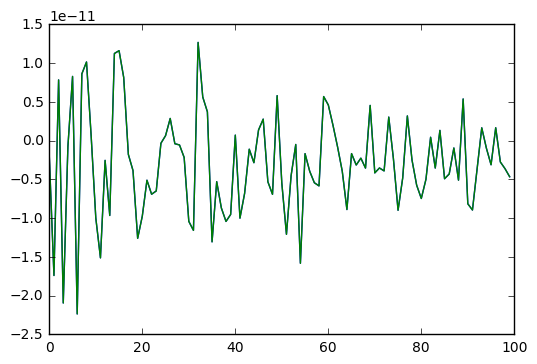

In [42]:
plt.plot(Probs)
plt.show()

In [16]:
TFsq= numCKM*T**2 *numICKM


In [17]:
TF=numCKM*T*numICKM
term1=(np.real(lam1)**2 + c1)*np.identity(3)
term2=np.real(lam1)*TF
print  term1*1e20+ term2*1e20  + TFsq*1e20

[[ -1.59919820e-18  -4.56381352e-18  -1.14164782e-06]
 [ -4.56720165e-18   3.55282676e-07  -3.64754117e-07]
 [ -1.14164782e-06  -3.64754117e-07  -1.34973435e-05]]


In [18]:
print term1
print term2
print TFsq
print term1[0,0]*1e20+term2[0,0]*1e20+TFsq[0,0]*1e20

[[ -6.29347945e-25  -0.00000000e+00  -0.00000000e+00]
 [ -0.00000000e+00  -6.29347945e-25  -0.00000000e+00]
 [ -0.00000000e+00  -0.00000000e+00  -6.29347945e-25]]
[[ -5.69267982e-25   2.09852298e-25   1.24759367e-25]
 [  2.09852298e-25   2.68289556e-25  -3.18926942e-26]
 [  1.24759367e-25  -3.18926942e-26   2.28423925e-25]]
[[  1.19861593e-24  -2.09852298e-25  -1.36175845e-25]
 [ -2.09852298e-25   3.64611215e-25   2.82451530e-26]
 [ -1.36175845e-25   2.82451530e-26   2.65950585e-25]]
-1.59919820442e-18


In [21]:
emax=1e10
emin=1e9
niter=100
eint=(emax-emin)/niter
emin+niter*eint

In [23]:
linsp=[]
for i in range(niter+1):
    linsp.append(emin+i*eint)
print linsp

[1000000000.0, 1090000000.0, 1180000000.0, 1270000000.0, 1360000000.0, 1450000000.0, 1540000000.0, 1630000000.0, 1720000000.0, 1810000000.0, 1900000000.0, 1990000000.0, 2080000000.0, 2170000000.0, 2260000000.0, 2350000000.0, 2440000000.0, 2530000000.0, 2620000000.0, 2710000000.0, 2800000000.0, 2890000000.0, 2980000000.0, 3070000000.0, 3160000000.0, 3250000000.0, 3340000000.0, 3430000000.0, 3520000000.0, 3610000000.0, 3700000000.0, 3790000000.0, 3880000000.0, 3970000000.0, 4060000000.0, 4150000000.0, 4240000000.0, 4330000000.0, 4420000000.0, 4510000000.0, 4600000000.0, 4690000000.0, 4780000000.0, 4870000000.0, 4960000000.0, 5050000000.0, 5140000000.0, 5230000000.0, 5320000000.0, 5410000000.0, 5500000000.0, 5590000000.0, 5680000000.0, 5770000000.0, 5860000000.0, 5950000000.0, 6040000000.0, 6130000000.0, 6220000000.0, 6310000000.0, 6400000000.0, 6490000000.0, 6580000000.0, 6670000000.0, 6760000000.0, 6850000000.0, 6940000000.0, 7030000000.0, 7120000000.0, 7210000000.0, 7300000000.0, 73900